## Statistical Inference with Confidence Intervals

Throughout week 2, we have explored the concept of confidence intervals, how to calculate them, interpret them, and what confidence really means.

In this tutorial, we're going to review how to calculate confidence intervals of population proportions and means.

To begin, let's go over some of the material from this week and why confidence intervals are useful tools when deriving insights from data.

### Why Confidence Intervals?

Confidence intervals are a calculated range or boundary around a parameter or a statistic that is supported mathematically with a certain level of confidence.  For example, in the lecture, we estimated, with 95% confidence, that the population proportion of parents with a toddler that use a car seat for all travel with their toddler was somewhere between 82.2% and 87.7%.

This is *__different__* than having a 95% probability that the true population proportion is within our confidence interval.

Essentially, if we were to repeat this process, 95% of our calculated confidence intervals would contain the true proportion.

### How are Confidence Intervals Calculated?

Our equation for calculating confidence intervals is as follows:

$$Best\ Estimate \pm Margin\ of\ Error$$

Where the *Best Estimate* is the **observed population proportion or mean** and the *Margin of Error* is the **t-multiplier**.

The t-multiplier is calculated based on the degrees of freedom and desired confidence level.  For samples with more than 30 observations and a confidence level of 95%, the t-multiplier is 1.96

The equation to create a 95% confidence interval can also be shown as:

$$Population\ Proportion\ or\ Mean\ \pm (t-multiplier *\ Standard\ Error)$$

Lastly, the Standard Error is calculated differenly for population proportion and mean:

$$Standard\ Error \ for\ Population\ Proportion = \sqrt{\frac{Population\ Proportion * (1 - Population\ Proportion)}{Number\ Of\ Observations}}$$

$$Standard\ Error \ for\ Mean = \frac{Standard\ Deviation}{\sqrt{Number\ Of\ Observations}}$$

Let's replicate the car seat example from lecture:

In [7]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [2]:
#
t_star = 1.96

# pop prop
p = .85

# sample size
n = 659

# standard error
se = np.sqrt((p * (1 - p)) / n)
se

0.01390952774409444

In [3]:
# lower and upper bounds
low_bound = p - t_star * se
up_bound  = p + t_star * se

low_bound, up_bound

(0.8227373256215749, 0.8772626743784251)

In [6]:
# statsmodels functionality
sm.stats.proportion_confint(n * p, n)

(0.8227378265796143, 0.8772621734203857)

### Cartwheel dataset

In [9]:
cartwheel = pd.read_csv('data/Cartwheeldata.csv')
cartwheel.head(3)

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56,F,1,Y,1,62.0,61.0,79,Y,1,7
1,2,26,F,1,Y,1,62.0,60.0,70,Y,1,8
2,3,33,F,1,Y,1,66.0,64.0,85,Y,1,7


In [10]:
mean = cartwheel['CWDistance'].mean()
std  = cartwheel['CWDistance'].std()
n    = len(cartwheel)

print(f'Mean: {mean}, STD: {std}, N: {n}')

Mean: 82.48, STD: 15.058552387264855, N: 25


In [11]:
t_star = 2.064
se = std / np.sqrt(n)

se

3.0117104774529713

In [12]:
low_bound = mean - se * t_star
up_bound  = mean + se * t_star

low_bound, up_bound

(76.26382957453707, 88.69617042546294)

### statsmodels

In [13]:
sm.stats.DescrStatsW(cartwheel['CWDistance'])\
        .zconfint_mean()

(76.57715593233026, 88.38284406766975)

## Confidence Intervals for Differences between Population Parameters

This tutorial is going to demonstrate how to load data, clean/manipulate a dataset, and construct a confidence interval for the difference between two population proportions and means.

We will use the 2015-2016 wave of the NHANES data for our analysis.

*Note: We have provided a notebook that includes more analysis, with examples of confidence intervals for one population proportions and means, in addition to the analysis I will show you in this tutorial.  I highly recommend checking it out!

For our population proportions, we will analyze the difference of proportion between female and male smokers.  The column that specifies smoker and non-smoker is "SMQ020" in our dataset.

For our population means, we will analyze the difference of mean of body mass index within our female and male populations.  The column that includes the body mass index value is "BMXBMI".

Additionally, the gender is specified in the column "RIAGENDR".

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [15]:
df = pd.read_csv('data/nhanes_2015_2016.csv')

df.head(3)

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0


### Investigating & Cleaning data

In [17]:
df['SMQ020x'] = df['SMQ020'].replace({1: 'yes', 2: 'no', 7: np.nan, 9: np.nan})

df['SMQ020x'].value_counts()

no     3406
yes    2319
Name: SMQ020x, dtype: int64

In [18]:
df['RIAGENDRx'] = df['RIAGENDR'].replace({1: 'male', 2: 'female'})

df['RIAGENDRx'].value_counts()

female    2976
male      2759
Name: RIAGENDRx, dtype: int64

In [19]:
dx = df[['SMQ020x', 'RIAGENDRx']].dropna()
dx.shape

(5725, 2)

In [21]:
pd.crosstab(dx.SMQ020x, dx.RIAGENDRx)

RIAGENDRx,female,male
SMQ020x,,
no,2066,1340
yes,906,1413


In [22]:
dx['SMQ020x'] = dx['SMQ020x'].replace({'yes': 1,
                                       'no': 0})
dx.head(3)

,SMQ020x,RIAGENDRx
0,1,male
1,1,male
2,1,male


In [29]:
dz = dx.groupby('RIAGENDRx').agg(['count', 'mean'])
dz.columns = ['Proportion', 'N']
dz

,Proportion,N
RIAGENDRx,,
female,2972,0.304845
male,2753,0.513258


### Constructing Confidence Intervals

Now that we have the population proportions of male and female smokers, we can begin to calculate confidence intervals.  From lecture, we know that the equation is as follows:

$$Best\ Estimate \pm Margin\ of\ Error$$

Where the *Best Estimate* is the **observed population proportion or mean** from the sample and the *Margin of Error* is the **t-multiplier**.

The equation to create a 95% confidence interval can also be shown as:

$$Population\ Proportion\ or\ Mean\ \pm (t-multiplier *\ Standard\ Error)$$

The Standard Error (SE) is calculated differenly for population proportion and mean:

$$Standard\ Error \ for\ Population\ Proportion = \sqrt{\frac{Population\ Proportion * (1 - Population\ Proportion)}{Number\ Of\ Observations}}$$

$$Standard\ Error \ for\ Mean = \frac{Standard\ Deviation}{\sqrt{Number\ Of\ Observations}}$$

Lastly, the standard error for difference of population proportions and means is:

$$Standard\ Error\ for\ Difference\ of\ Two\ Population\ Proportions\ Or\ Means = \sqrt{(SE_{\ 1})^2 + (SE_{\ 2})^2}$$

#### Difference of Two Population Proportions

In [32]:
p_female = .304845
n_female = 2972

se_female = np.sqrt(p_female * (1 - p_female) / n_female)
se_female

0.00844415041930423

In [33]:
p_male = .513258
n_male = 2753

se_male = np.sqrt(p_male * (1 - p_male) / n_male)
se_male

0.009526078787008965

In [34]:
se_diff = np.sqrt(se_female ** 2 + se_male ** 2)
se_diff

0.012729880335656654

In [35]:
d = p_female - p_male
lower_bound = d - 1.96 * se_diff
upper_bound = d + 1.96 * se_diff

lower_bound, upper_bound

(-0.23336356545788706, -0.18346243454211297)

### Difference of two population means: BMI

count    5662.000000
mean       29.382197
std         7.095921
min        14.500000
25%        24.300000
50%        28.300000
75%        33.000000
max        67.300000
Name: BMXBMI, dtype: float64


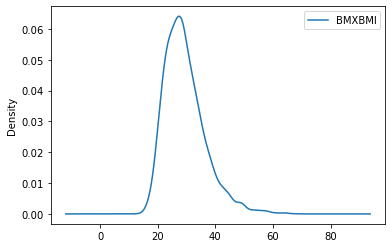

In [40]:
print(df['BMXBMI'].describe())

df[['BMXBMI']].plot(kind='kde')
plt.show()

In [41]:
df.groupby('RIAGENDRx').agg({'BMXBMI': [np.mean, np.std, np.size]})6.252568

BMXBMI                
                mean       std  size
RIAGENDRx                           
female     29.939946  7.753319  2976
male       28.778072  6.252568  2759

In [49]:
se_female = 7.753319 / np.sqrt(2976)
se_male   = 6.252568 / np.sqrt(2759)

se_female, se_male

(0.14212523289878048, 0.11903716451870151)

In [50]:
se_diff = np.sqrt(se_female ** 2 + se_male ** 2)
se_diff

0.18538993598139303

In [52]:
# diff of means
d = 29.939946 - 28.778072

lower_bound, upper_bound = d - 1.96 * se_diff, d + 1.96 * se_diff

lower_bound, upper_bound

(0.798509725476467, 1.5252382745235278)